In [795]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json
from sklearn.linear_model import LinearRegression
import pandas as pd


file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
latency_path = "/home/sunyi/CoT/Time-Constrained-CoT/latency/0212"
model_list = [
    "Qwen/QwQ-32B-Preview",
    # "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
    # "PowerInfer/SmallThinker-3B-Preview",
    "NovaSky-AI/Sky-T1-32B-Preview",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    # "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    "mistralai/Mathstral-7B-v0.1",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct",
    "Qwen/Qwen2.5-7B-Instruct",
    "Qwen/Qwen2.5-3B-Instruct",
    "Qwen/Qwen2.5-1.5B-Instruct",
    "mistralai/Mistral-Small-Instruct-2409",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "microsoft/phi-4",
    "meta-llama/Llama-3.1-8B-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
]

qwen_25_series = [ 
    # "Qwen/Qwen2.5-Math-1.5B-Instruct",
    # "Qwen/Qwen2.5-Math-7B-Instruct",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct",
    "Qwen/Qwen2.5-7B-Instruct",
    "Qwen/Qwen2.5-3B-Instruct",
    "Qwen/Qwen2.5-1.5B-Instruct",
]
# mistral_series = [
#     # "mistralai/Mathstral-7B-v0.1",
#     "mistralai/Mistral-Small-Instruct-2409",
#     "mistralai/Mistral-Nemo-Instruct-2407",
#     "mistralai/Ministral-8B-Instruct-2410",
# ]
gemma_series = [
    "google/gemma-2-27b-it",
    "google/gemma-2-9b-it",
    "google/gemma-2-2b-it",
]
phi_series = [
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    # "microsoft/Phi-3.5-mini-instruct",
    # "microsoft/phi-4",
]
llama_series = [
    # "meta-llama/Llama-3.1-8B-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
]
reasoning_series = [
    # "Qwen/QwQ-32B-Preview",
    # "NovaSky-AI/Sky-T1-32B-Preview",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
]

model_series = {
    "Qwen": qwen_25_series,
    # "Phi": phi_series,
    # "Gemma": gemma_series,
    # "Llama":llama_series,
    # "DeepSeek-R1-Distill": reasoning_series,
}

In [796]:
# PROMP_LIST = ["-sbs-budget-hard", "-aav", "-c2f", "-sbs", "-sbs-hard"]
# PROMP_LIST = [ "-sbs", "-c2f", "-aav"]
PROMP_LIST = [ "-sbs"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    "internlm/internlm2_5-1_8b-chat": "internlm",
    "internlm/internlm2_5-7b-chat": "internlm",
    "internlm/internlm2_5-20b-chat": "internlm",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

In [797]:
def gen_budget_latency_list(budget, data_name, model, prompt_type):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 100):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
    
    if "hard" not in prompt_type:
        budget_list = [budget + 25 for budget in budget_list]
    
    tokens = np.array([64, 128, 256, 512, 1024])
    file = model.split("/")[-1] + "_a800.csv"
    df = pd.read_csv(os.path.join(latency_path, file))
    latencies = df.iloc[1, 1:].values
    # Perform linear regression on the measured latency data
    linear_model = LinearRegression()
    tokens = tokens.reshape(-1, 1)
    linear_model.fit(tokens, latencies)
    print(f"File: {file} - Linear Fit: Slope = {linear_model.coef_[0]:.2f}, Intercept = {linear_model.intercept_:.2f}")
    print(f"File: {file} - R^2 Score: {linear_model.score(tokens, latencies):.2f}")
    # change budget_list into latency_list using the linear regression model
    budget_list = np.array(budget_list)
    budget_list = budget_list.reshape(-1, 1)
    latency_list = linear_model.predict(budget_list)
    budget_list = budget_list.reshape(1, -1)[0]
    latency_list = latency_list.reshape(1, -1)[0]

    if "hard" not in prompt_type:
        budget_list = [budget - 25 for budget in budget_list]

    return budget_list, latency_list

In [798]:
datasets = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [799]:
model_acc_dicts = {}
model_latency_dicts = {}


for model in model_list:
    model_acc_dict = {}

    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        budget_list, latency_list = gen_budget_latency_list(1, datasets, model, prompt_type)
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, datasets, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict
    model_latency_dicts[model] = latency_list

model_latency_dicts

File: QwQ-32B-Preview_a800.csv - Linear Fit: Slope = 0.05, Intercept = -0.26
File: QwQ-32B-Preview_a800.csv - R^2 Score: 1.00
File: Sky-T1-32B-Preview_a800.csv - Linear Fit: Slope = 0.05, Intercept = -0.27
File: Sky-T1-32B-Preview_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-1.5B_a800.csv - Linear Fit: Slope = 0.02, Intercept = 0.04
File: DeepSeek-R1-Distill-Qwen-1.5B_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-7B_a800.csv - Linear Fit: Slope = 0.02, Intercept = -0.00
File: DeepSeek-R1-Distill-Qwen-7B_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-14B_a800.csv - Linear Fit: Slope = 0.04, Intercept = -0.68
File: DeepSeek-R1-Distill-Qwen-14B_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-32B_a800.csv - Linear Fit: Slope = 0.05, Intercept = -0.29
File: DeepSeek-R1-Distill-Qwen-32B_a800.csv - R^2 Score: 1.00
File: Qwen2.5-Math-1.5B-Instruct_a800.csv - Linear Fit: Slope = 0.02, Intercept = -0.00
File: Qwen2.5-Math-1.5B-Instruct_a800.csv - R^2

{'Qwen/QwQ-32B-Preview': array([ 2.44271621,  3.79495114,  5.14718607,  6.49942101,  7.85165594,
         9.20389088, 10.55612581, 11.90836074, 13.26059568, 14.61283061,
        15.96506554, 17.31730048, 20.02177034, 22.72624021, 25.43071008,
        28.13517995, 30.83964981, 33.54411968, 38.95305942, 44.36199915,
        49.77093888, 55.17987862, 60.58881835, 65.99775809]),
 'NovaSky-AI/Sky-T1-32B-Preview': array([ 2.42890012,  3.77807135,  5.12724259,  6.47641382,  7.82558505,
         9.17475628, 10.52392752, 11.87309875, 13.22226998, 14.57144122,
        15.92061245, 17.26978368, 19.96812615, 22.66646862, 25.36481108,
        28.06315355, 30.76149602, 33.45983848, 38.85652342, 44.25320835,
        49.64989328, 55.04657821, 60.44326315, 65.83994808]),
 'deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B': array([ 1.02666235,  1.5177347 ,  2.00880705,  2.49987939,  2.99095174,
         3.48202409,  3.97309643,  4.46416878,  4.95524113,  5.44631347,
         5.93738582,  6.42845817,  7.4106028

In [800]:
# font_size = 60
# # Create a 1*5 subplot
# fig, axs = plt.subplots(len(PROMP_LIST), len(model_series), figsize=(50, 38), constrained_layout=True)
# plt.suptitle("GSM8k",fontsize = 80, y=1)
# marker_size = 5  # Set the desired marker size
# line_width = 2   # Set the desired line width

# # Flatten the axes array for easy iteration
# axs = axs.flatten()

# index = 0

# for prompt_type_0 in PROMP_LIST:
#         for series, model_names in model_series.items():
#             integral_values = {}
#             for model in model_names:    
#                 prompt_type = MODEL_SERIES_MAP[model] + prompt_type_0
#                 latency = np.array(model_latency_dicts[model])
#                 acc = np.array(model_acc_dicts[model][prompt_type])
#                 mask = latency <= 30
#                 latency = latency[mask]
#                 acc = acc[mask]
#                 # if model == "Qwen/Qwen2.5-7B-Instruct" :
#                 #     line_width*=2
#                 if series == "Qwen":
#                     axs[index].plot(latency, acc, label="Qwen-2.5"+'-'+model.split('/')[-1].split('-')[1],
#                                 linewidth=line_width*2.5)             # 标记大小
#                 elif series == "DeepSeek-R1-Distill":
#                     axs[index].plot(latency, acc, label="DRD-"+model.split('/')[-1].split('-')[3]+'-'+model.split('/')[-1].split('-')[4],
#                                 linewidth=line_width*2.5)
#                 else :
#                     axs[index].plot(latency, acc,  label=model.split('/')[-1].split('-')[0]+'-'+model.split('/')[-1].split('-')[1]+'-'+model.split('/')[-1].split('-')[2],
#                                 linewidth=line_width*2.5)   
#                 # if model == "Qwen/Qwen2.5-7B-Instruct" :
#                 #     line_width/=2     
#             axs[index].set_xlabel("Latency (s)",fontsize = font_size)
#             axs[index].set_ylabel("Accuracy", fontsize = font_size)
#             axs[index].set_title(prompt_type_0[1:], fontsize = font_size)
#             axs[index].legend(fontsize = 40,loc='lower right')
#             axs[index].tick_params(axis='both', which='major', labelsize=font_size)
#             index += 1
#             # Set y-axis and x-axis ticks
#             # axs[index].set_yticks(range(0, 101, 10))  # Set y-axis interval to 10
#         # set the title
#         # plt.suptitle(series)
#         # Adjust layout
#         plt.tight_layout()
#         plt.subplots_adjust(hspace = 0.33) 
#         plt.savefig('all_gsm8k_size_a800.pdf')

/tmp/ipykernel_2002728/1920211888.py:4: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=1.5)
/tmp/ipykernel_2002728/1920211888.py:202: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


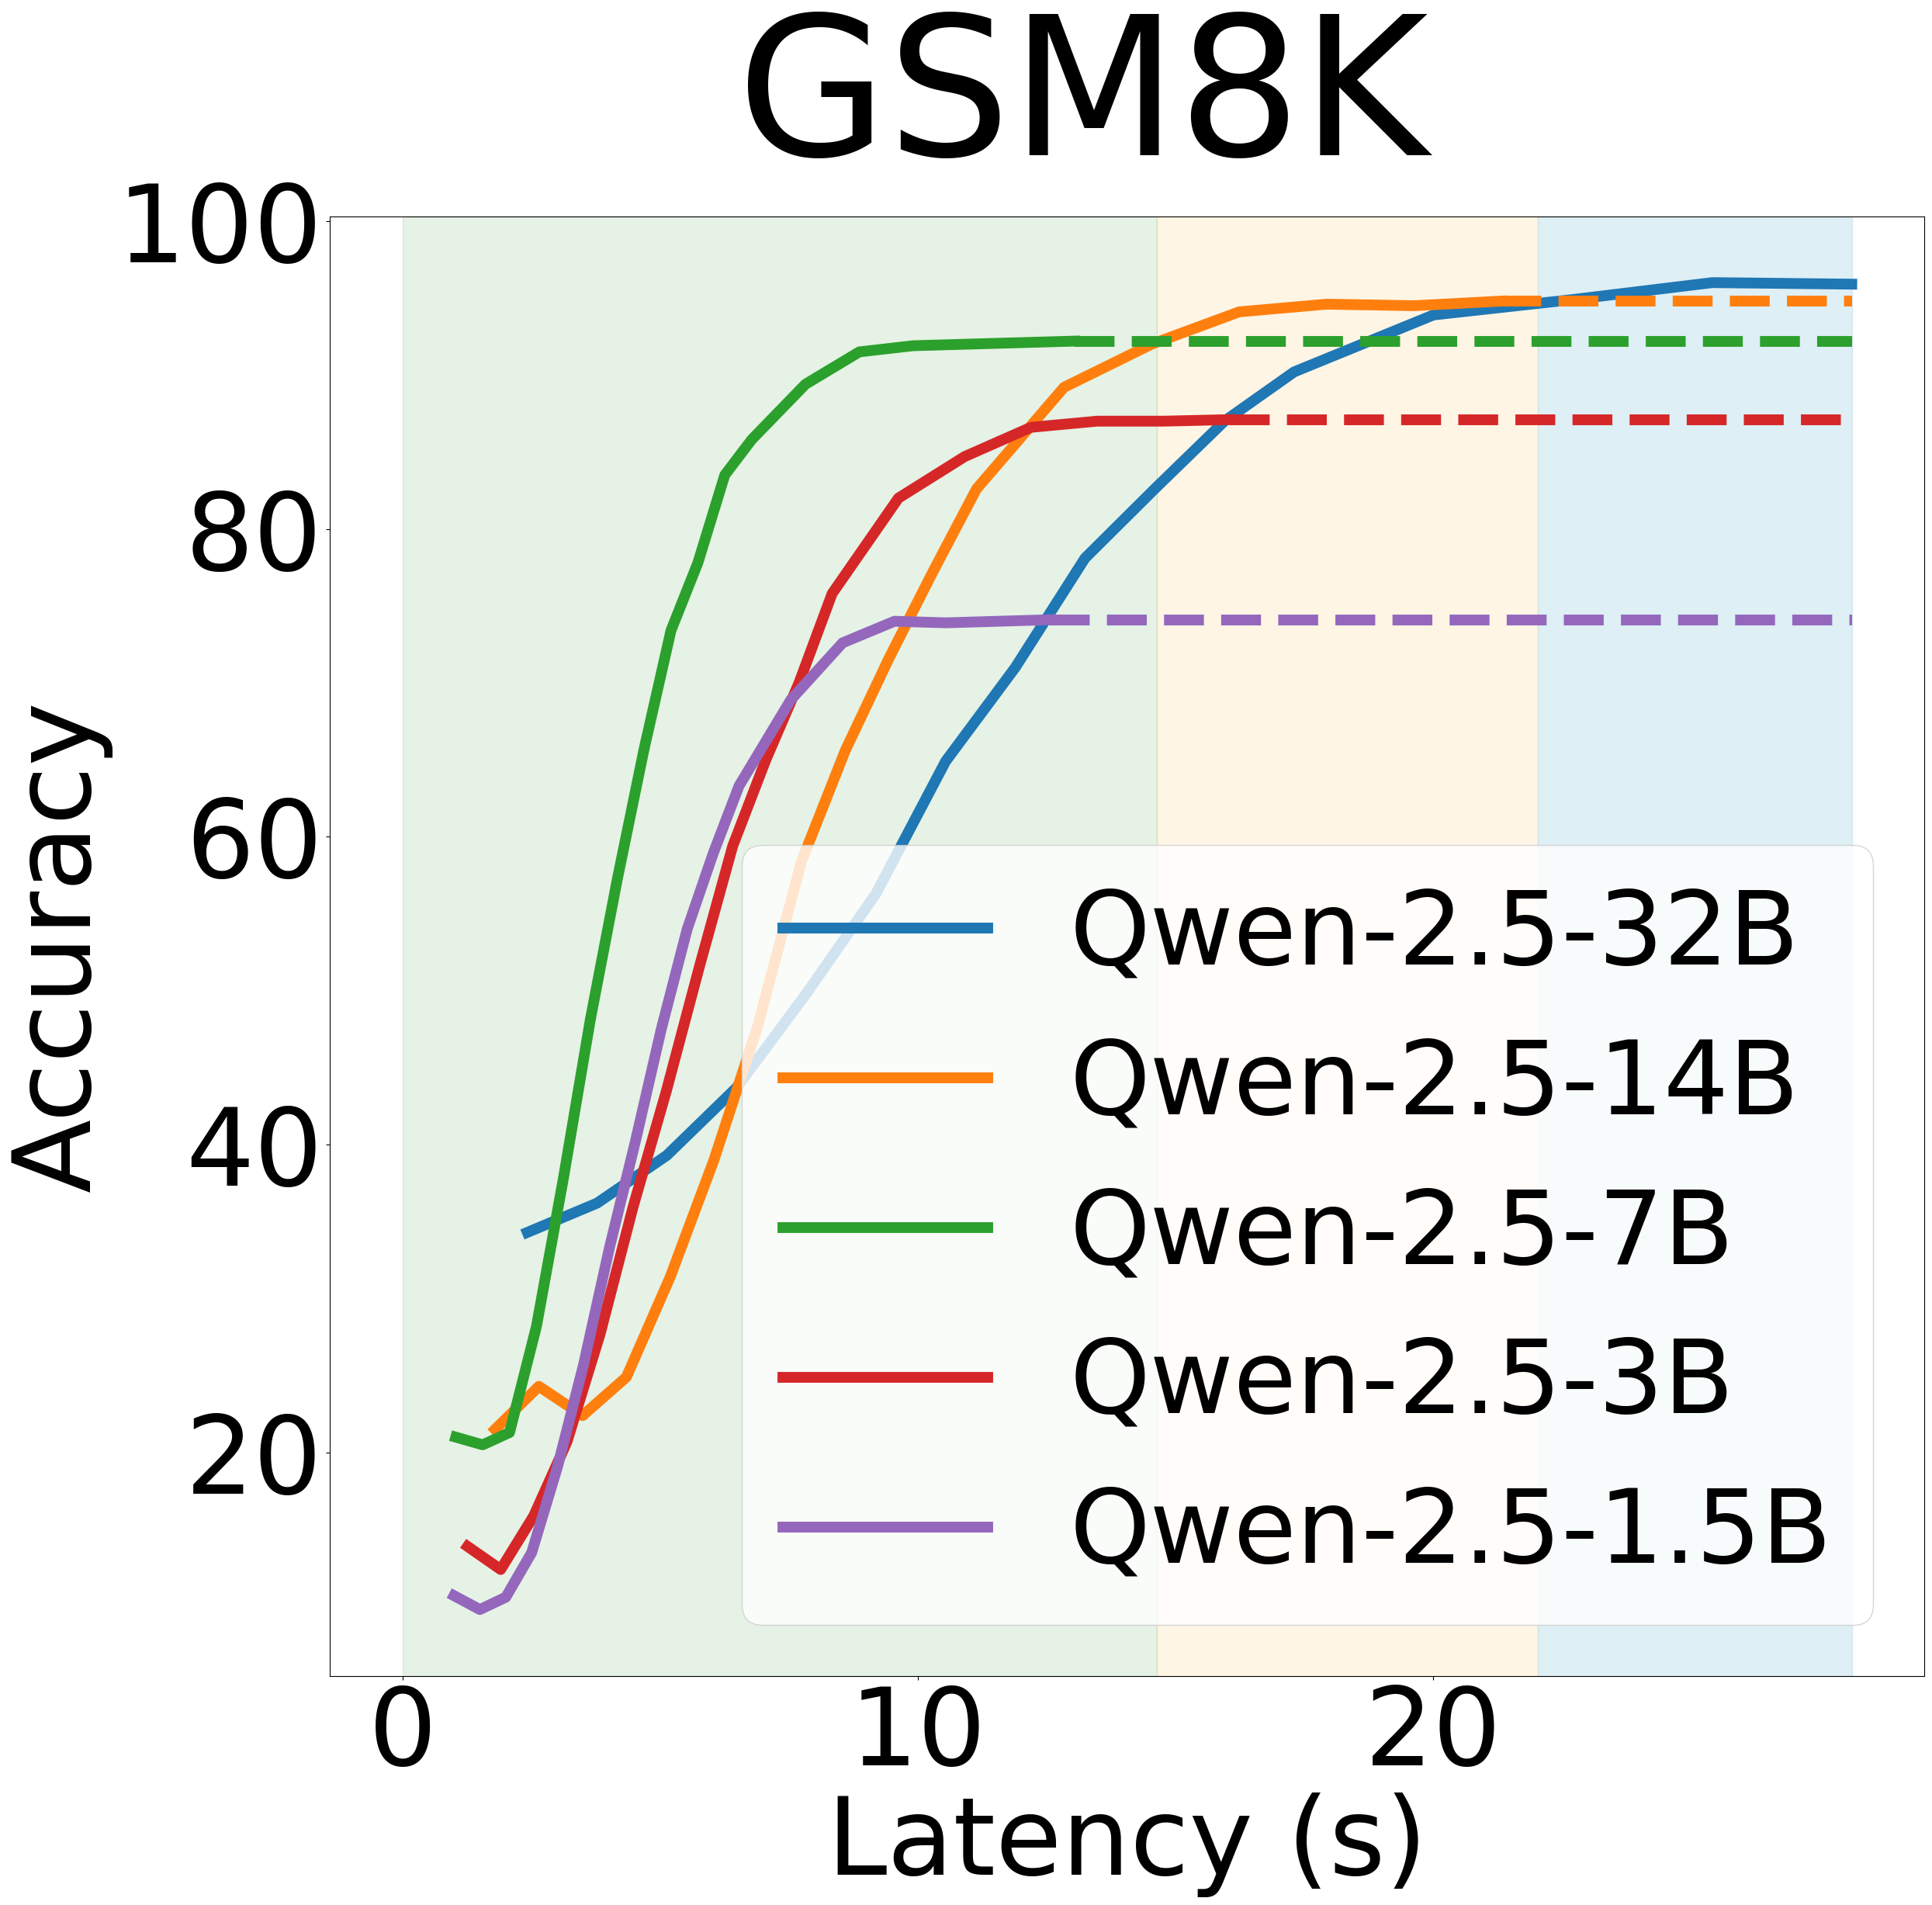

In [801]:
font_size = 100
# Create a 1*5 subplot
fig, axs = plt.subplots(len(PROMP_LIST), len(model_series), figsize=(25, 25), constrained_layout=True)
plt.subplots_adjust(wspace=1.5) 
plt.suptitle("GSM8K",fontsize = 180,x=0.56)
#plt.subplots_adjust(hspace=0.5) 
marker_size = 5  # Set the desired marker size
line_width = 10   # Set the desired line width

# Flatten the axes array for easy iteration
#axs = axs.flatten()

index = 0

rec_x = [model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"][0],model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"][-1],model_latency_dicts["Qwen/Qwen2.5-14B-Instruct"][-1],model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]]
            
model_latency_dicts["Qwen/Qwen2.5-1.5B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-1.5B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-3B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-3B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-14B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-14B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)

model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-3B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-3B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-3B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]['qwen-sbs'][-3]
)


for prompt_type_0 in PROMP_LIST:
        for series, model_names in model_series.items():
            integral_values = {}
            
            for model in model_names:    
                prompt_type = MODEL_SERIES_MAP[model] + prompt_type_0
                latency = np.array(model_latency_dicts[model])
                acc = np.array(model_acc_dicts[model][prompt_type])
                mask = latency <= 30
                latency = latency[mask]
                acc = acc[mask]
                line, = axs.plot(latency[:-1], acc[:-1], 
                        label="Qwen-2.5" + '-' + model.split('/')[-1].split('-')[1],
                        linewidth=line_width,)  # 实线颜色
                
                line_color = line.get_color()
                
                # 绘制虚线部分（最后一段）
                axs.plot(latency[-2:], acc[-2:], 
                        linestyle='--',  # 虚线样式
                        linewidth=line_width ,
                        color = line_color)  # 虚线颜色
                
            axs.axvspan(
                xmin=0, 
                xmax=rec_x[1]+1.6,           # x range
                color='green',      # fill color
                alpha=0.1,             # transparency
                zorder=0               # ensure shading is behind lines
            )

            axs.axvspan(
                xmin=rec_x[1]+1.6, 
                xmax=rec_x[2]+0.7,           # x range
                color='orange',      # fill color
                alpha=0.10,             # transparency
                zorder=0               # ensure shading is behind lines
            )

            axs.axvspan(
                xmin=rec_x[2]+0.7, 
                xmax=rec_x[3],           # x range
                color='lightblue',      # fill color
                alpha=0.4,             # transparency
                zorder=0               # ensure shading is behind lines
            )

            axs.set_xlabel("Latency (s)",fontsize = font_size)
            axs.set_ylabel("Accuracy", fontsize = font_size)
            axs.legend(fontsize = 95,loc='lower right')
            axs.tick_params(axis='both', which='major', labelsize=font_size)
            index += 1

        plt.tight_layout()
        plt.savefig('gsm8k_size_a800.pdf')


In [802]:
dataset = "math500"
something = "_-1_seed0_t0.0_s0_e-1"

In [803]:
model_acc_dicts = {}
model_latency_dicts = {}

for model in model_list:
    model_acc_dict = {}

    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        budget_list, latency_list = gen_budget_latency_list(1, dataset, model, prompt_type)
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict
    model_latency_dicts[model] = latency_list

model_latency_dicts

File: QwQ-32B-Preview_a800.csv - Linear Fit: Slope = 0.05, Intercept = -0.26
File: QwQ-32B-Preview_a800.csv - R^2 Score: 1.00
File: Sky-T1-32B-Preview_a800.csv - Linear Fit: Slope = 0.05, Intercept = -0.27
File: Sky-T1-32B-Preview_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-1.5B_a800.csv - Linear Fit: Slope = 0.02, Intercept = 0.04
File: DeepSeek-R1-Distill-Qwen-1.5B_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-7B_a800.csv - Linear Fit: Slope = 0.02, Intercept = -0.00
File: DeepSeek-R1-Distill-Qwen-7B_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-14B_a800.csv - Linear Fit: Slope = 0.04, Intercept = -0.68
File: DeepSeek-R1-Distill-Qwen-14B_a800.csv - R^2 Score: 1.00
File: DeepSeek-R1-Distill-Qwen-32B_a800.csv - Linear Fit: Slope = 0.05, Intercept = -0.29
File: DeepSeek-R1-Distill-Qwen-32B_a800.csv - R^2 Score: 1.00
File: Qwen2.5-Math-1.5B-Instruct_a800.csv - Linear Fit: Slope = 0.02, Intercept = -0.00
File: Qwen2.5-Math-1.5B-Instruct_a800.csv - R^2

{'Qwen/QwQ-32B-Preview': array([  2.44271621,   3.79495114,   5.14718607,   6.49942101,
          7.85165594,   9.20389088,  10.55612581,  11.90836074,
         13.26059568,  14.61283061,  15.96506554,  17.31730048,
         18.66953541,  20.02177034,  21.37400528,  22.72624021,
         24.07847515,  25.43071008,  26.78294501,  28.13517995,
         29.48741488,  30.83964981,  32.19188475,  33.54411968,
         38.95305942,  44.36199915,  49.77093888,  55.17987862,
         60.58881835,  65.99775809,  71.40669782,  76.81563756,
         82.22457729,  87.63351703,  93.04245676,  98.4513965 ,
        103.86033623, 109.26927597, 114.6782157 , 120.08715543,
        125.49609517, 130.9050349 ]),
 'NovaSky-AI/Sky-T1-32B-Preview': array([  2.42890012,   3.77807135,   5.12724259,   6.47641382,
          7.82558505,   9.17475628,  10.52392752,  11.87309875,
         13.22226998,  14.57144122,  15.92061245,  17.26978368,
         18.61895492,  19.96812615,  21.31729738,  22.66646862,
         

AttributeError: 'Axes' object has no attribute 'flatten'

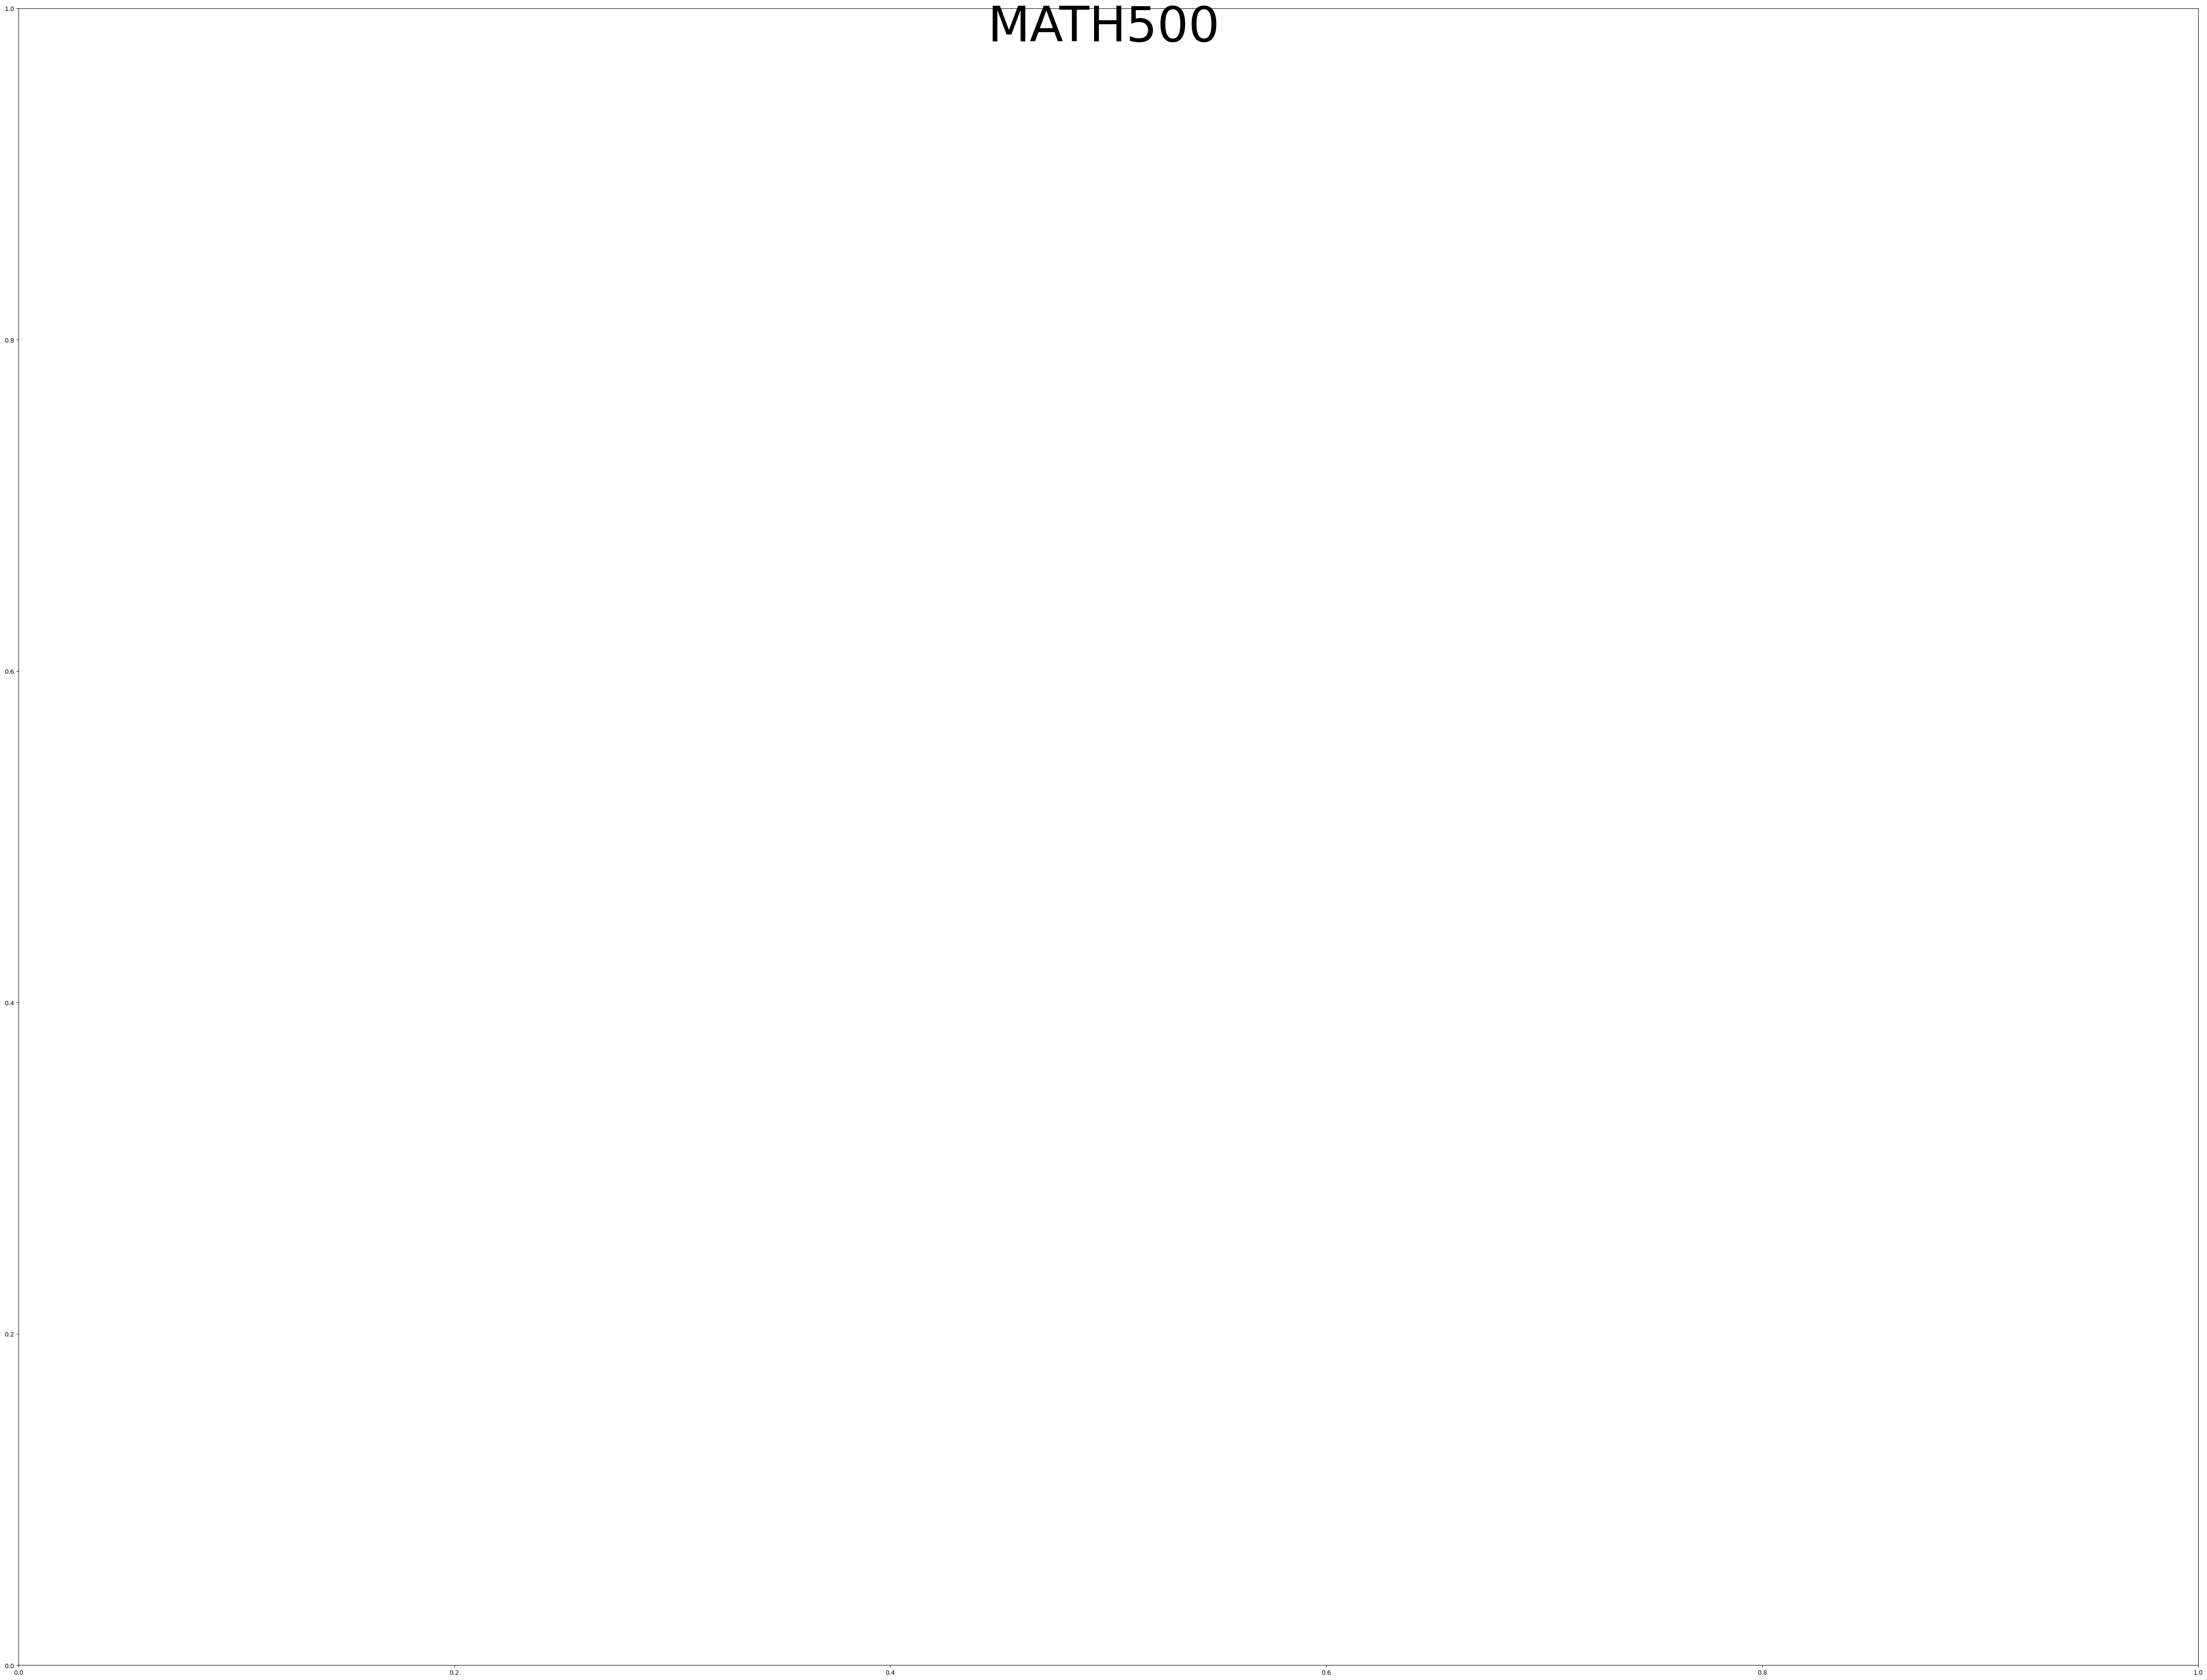

In [804]:
# font_size = 60
# # Create a 1*5 subplot
# fig, axs = plt.subplots(len(PROMP_LIST), len(model_series), figsize=(50, 38), constrained_layout=True)
# plt.suptitle("MATH500",fontsize = 80, y=1)
# marker_size = 5  # Set the desired marker size
# line_width = 2   # Set the desired line width

# # Flatten the axes array for easy iteration
# axs = axs.flatten()

# index = 0

# for prompt_type_0 in PROMP_LIST:
#         for series, model_names in model_series.items():
#             integral_values = {}
#             for model in model_names:    
#                 prompt_type = MODEL_SERIES_MAP[model] + prompt_type_0
#                 latency = np.array(model_latency_dicts[model])
#                 acc = np.array(model_acc_dicts[model][prompt_type])
#                 mask = latency <= 30
#                 latency = latency[mask]
#                 acc = acc[mask]
#                 # if model == "Qwen/Qwen2.5-7B-Instruct" :
#                 #     line_width*=2
#                 if series == "Qwen":
#                     axs[index].plot(latency, acc, label="Qwen-2.5"+'-'+model.split('/')[-1].split('-')[1],
#                                 linewidth=line_width*2.5)             # 标记大小
#                 elif series == "DeepSeek-R1-Distill":
#                     axs[index].plot(latency, acc, label="DRD-"+model.split('/')[-1].split('-')[3]+'-'+model.split('/')[-1].split('-')[4],
#                                 linewidth=line_width*2.5)
#                 else :
#                     axs[index].plot(latency, acc,  label=model.split('/')[-1].split('-')[0]+'-'+model.split('/')[-1].split('-')[1]+'-'+model.split('/')[-1].split('-')[2],
#                                 linewidth=line_width*2.5)   
#                 # if model == "Qwen/Qwen2.5-7B-Instruct" :
#                 #     line_width/=2     
#             axs[index].set_xlabel("Latency (s)",fontsize = font_size)
#             axs[index].set_ylabel("Accuracy", fontsize = font_size)
#             axs[index].set_title(prompt_type_0[1:], fontsize = font_size)
#             axs[index].legend(fontsize = 40,loc='lower right')
#             axs[index].tick_params(axis='both', which='major', labelsize=font_size)
#             index += 1
#             # Set y-axis and x-axis ticks
#             # axs[index].set_yticks(range(0, 101, 10))  # Set y-axis interval to 10
#         # set the title
#         # plt.suptitle(series)
#         # Adjust layout
#         plt.tight_layout()
#         plt.subplots_adjust(hspace = 0.33) 
#         plt.savefig('all_math500_size_a800.pdf')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

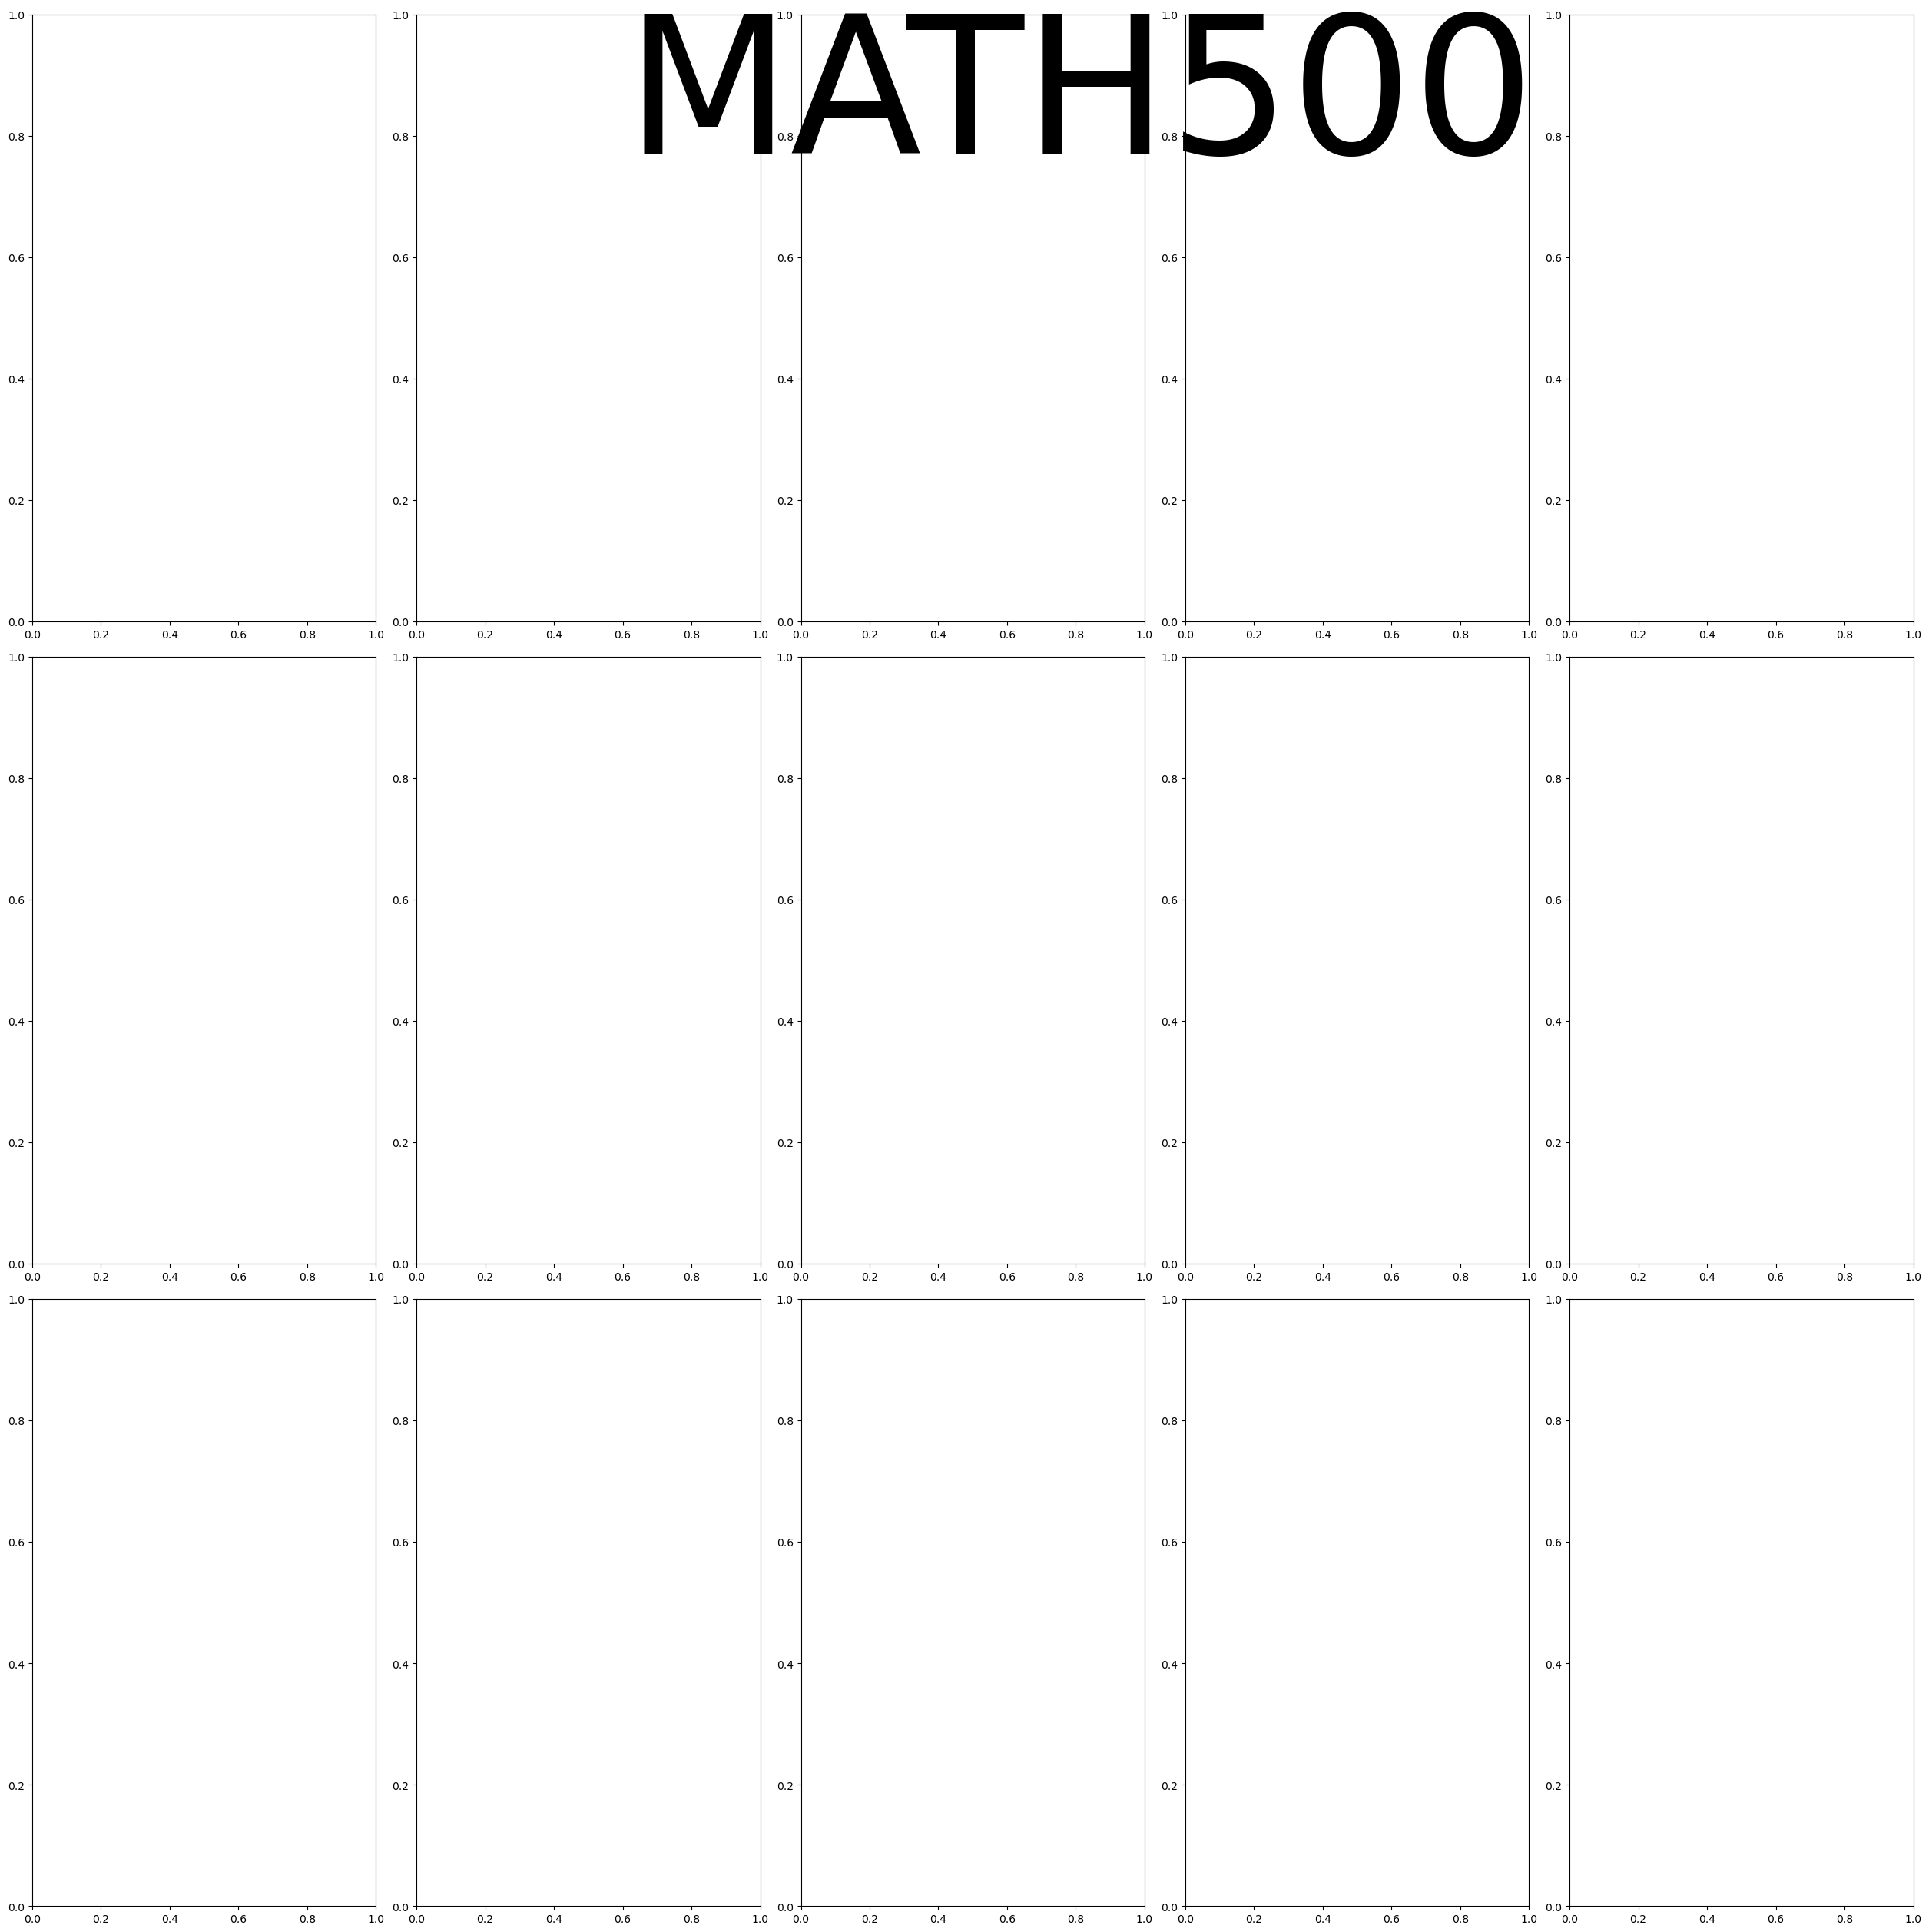

In [ ]:
font_size = 100
# Create a 1*5 subplot
fig, axs = plt.subplots(len(PROMP_LIST), len(model_series), figsize=(25, 25), constrained_layout=True)
 
plt.suptitle("MATH500",fontsize = 180,x=0.56,y = 1)
marker_size = 5  # Set the desired marker size
line_width = 10   # Set the desired line width

# Flatten the axes array for easy iteration

index = 0

rec_x = [model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"][0],model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"][-1],model_latency_dicts["Qwen/Qwen2.5-14B-Instruct"][-1],model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]]
            
model_latency_dicts["Qwen/Qwen2.5-1.5B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-1.5B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-3B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-3B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-7B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-14B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-14B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)
model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"] = np.append(
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"], 
    model_latency_dicts["Qwen/Qwen2.5-32B-Instruct"][-3]
)

model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-1.5B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-3B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-3B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-3B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-7B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-14B-Instruct"]['qwen-sbs'][-1]
)
model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]['qwen-sbs'] = np.append(
    model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]['qwen-sbs'], 
    model_acc_dicts["Qwen/Qwen2.5-32B-Instruct"]['qwen-sbs'][-3]
)


for prompt_type_0 in PROMP_LIST:
        for series, model_names in model_series.items():
            integral_values = {}
            
            for model in model_names:    
                prompt_type = MODEL_SERIES_MAP[model] + prompt_type_0
                latency = np.array(model_latency_dicts[model])
                acc = np.array(model_acc_dicts[model][prompt_type])
                mask = latency <= 60
                latency = latency[mask]
                acc = acc[mask]

                # 绘制实线部分（除最后一段）
                line, = axs.plot(latency[:-1], acc[:-1], 
                        label="Qwen-2.5" + '-' + model.split('/')[-1].split('-')[1],
                        linewidth=line_width ,)  # 实线颜色
                
                line_color = line.get_color()
                
                # 绘制虚线部分（最后一段）
                axs.plot(latency[-2:], acc[-2:], 
                        linestyle='--',  # 虚线样式
                        linewidth=line_width ,
                        color = line_color)  # 虚线颜色

            axs.axvspan(
                xmin=0, 
                xmax=rec_x[0]+1.2,           # x range
                color='green',      # fill color
                alpha=0.10,             # transparency
                zorder=0               # ensure shading is behind lines
            )
            
            axs.axvspan(
                xmin=rec_x[0]+1.2, 
                xmax=rec_x[0]+3.9,           # x range
                color='lightblue',      # fill color
                alpha=0.40,              # transparency
                zorder=0               # ensure shading is behind lines
            )
            
            axs.axvspan(
                xmin=rec_x[0]+3.9, 
                xmax=rec_x[1]-1,           # x range
                color='green',      # fill color
                alpha=0.10,             # transparency
                zorder=0               # ensure shading is behind lines
            )
            
            axs.axvspan(
                xmin=rec_x[1]-1, 
                xmax=rec_x[2]+6,           # x range
                color='orange',      # fill color
                alpha=0.10,             # transparency
                zorder=0               # ensure shading is behind lines
            )

            axs.axvspan(
                xmin=rec_x[2]+6, 
                xmax=rec_x[3],           # x range
                color='lightblue',      # fill color
                alpha=0.4,             # transparency
                zorder=0               # ensure shading is behind lines
            )

            axs.set_xlabel("Latency (s)",fontsize = font_size)
            axs.set_ylabel("Accuracy", fontsize = font_size)
            axs.legend(fontsize = 95,loc='lower right')
            axs.tick_params(axis='both', which='major', labelsize=font_size)
            index += 1

        plt.tight_layout()
        plt.savefig('math500_size_a800.pdf')
